## Develop a model to find the variables that are significant in the demand for shared bikes with the available independent variables and report appropriate metrics of your model evaluation

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df = pd.read_excel('day.xlsx')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2018-01-01 00:00:00,1.0,0.0,1.0,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,2018-02-01 00:00:00,1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3.0,2018-03-01 00:00:00,1.0,0.0,1.0,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4.0,2018-04-01 00:00:00,1.0,0.0,1.0,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5.0,2018-05-01 00:00:00,1.0,0.0,1.0,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726.0,27-12-2019,1.0,1.0,12.0,0.0,5.0,1.0,2.0,10.420847,11.33210,65.2917,23.458911,247.0,1867.0,2114.0
726,727.0,28-12-2019,1.0,1.0,12.0,0.0,6.0,0.0,2.0,10.386653,12.75230,59.0000,10.416557,644.0,2451.0,3095.0
727,728.0,29-12-2019,1.0,1.0,12.0,0.0,0.0,0.0,2.0,10.386653,12.12000,75.2917,8.333661,159.0,1182.0,1341.0
728,729.0,30-12-2019,1.0,1.0,12.0,0.0,1.0,1.0,1.0,10.489153,11.58500,48.3333,23.500518,364.0,1432.0,1796.0


### Data Understanding

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    float64
 1   dteday      730 non-null    object 
 2   season      730 non-null    float64
 3   yr          730 non-null    float64
 4   mnth        730 non-null    float64
 5   holiday     730 non-null    float64
 6   weekday     730 non-null    float64
 7   workingday  730 non-null    float64
 8   weathersit  730 non-null    float64
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    float64
 14  registered  730 non-null    float64
 15  cnt         730 non-null    float64
dtypes: float64(15), object(1)
memory usage: 91.4+ KB


In [5]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.dtypes

instant       float64
dteday         object
season        float64
yr            float64
mnth          float64
holiday       float64
weekday       float64
workingday    float64
weathersit    float64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
dtype: object

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

In [8]:
df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


### Data Preparation

In [9]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
bike = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,985.0
1,1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,801.0
2,1.0,0.0,1.0,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,1349.0
3,1.0,0.0,1.0,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,1562.0
4,1.0,0.0,1.0,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.0,1.0,12.0,0.0,5.0,1.0,2.0,10.420847,11.33210,65.2917,23.458911,2114.0
726,1.0,1.0,12.0,0.0,6.0,0.0,2.0,10.386653,12.75230,59.0000,10.416557,3095.0
727,1.0,1.0,12.0,0.0,0.0,0.0,2.0,10.386653,12.12000,75.2917,8.333661,1341.0
728,1.0,1.0,12.0,0.0,1.0,1.0,1.0,10.489153,11.58500,48.3333,23.500518,1796.0


In [11]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    float64
 1   yr          730 non-null    float64
 2   mnth        730 non-null    float64
 3   holiday     730 non-null    float64
 4   weekday     730 non-null    float64
 5   workingday  730 non-null    float64
 6   weathersit  730 non-null    float64
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    float64
dtypes: float64(12)
memory usage: 68.6 KB


In [12]:
bike['season'] = bike['season'].astype('category')
bike['weathersit'] = bike['weathersit'].astype('category')
bike['mnth'] = bike['mnth'].astype('category')
bike['weekday'] = bike['weekday'].astype('category')

In [13]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    float64 
 2   mnth        730 non-null    category
 3   holiday     730 non-null    float64 
 4   weekday     730 non-null    category
 5   workingday  730 non-null    float64 
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    float64 
dtypes: category(4), float64(8)
memory usage: 49.7 KB


In [14]:
bike.shape

(730, 12)

In [15]:
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,14.110847,18.18125,80.5833,10.749882,985.0
1,1.0,0.0,1.0,0.0,2.0,1.0,2.0,14.902598,17.68695,69.6087,16.652113,801.0
2,1.0,0.0,1.0,0.0,3.0,1.0,1.0,8.050924,9.47025,43.7273,16.636703,1349.0
3,1.0,0.0,1.0,0.0,4.0,1.0,1.0,8.200000,10.60610,59.0435,10.739832,1562.0
4,1.0,0.0,1.0,0.0,5.0,1.0,1.0,9.305237,11.46350,43.6957,12.522300,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1.0,1.0,12.0,0.0,5.0,1.0,2.0,10.420847,11.33210,65.2917,23.458911,2114.0
726,1.0,1.0,12.0,0.0,6.0,0.0,2.0,10.386653,12.75230,59.0000,10.416557,3095.0
727,1.0,1.0,12.0,0.0,0.0,0.0,2.0,10.386653,12.12000,75.2917,8.333661,1341.0
728,1.0,1.0,12.0,0.0,1.0,1.0,1.0,10.489153,11.58500,48.3333,23.500518,1796.0


In [16]:
bike = pd.get_dummies(bike, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    float64
 1   holiday         730 non-null    float64
 2   workingday      730 non-null    float64
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    float64
 8   season_2.0      730 non-null    uint8  
 9   season_3.0      730 non-null    uint8  
 10  season_4.0      730 non-null    uint8  
 11  mnth_2.0        730 non-null    uint8  
 12  mnth_3.0        730 non-null    uint8  
 13  mnth_4.0        730 non-null    uint8  
 14  mnth_5.0        730 non-null    uint8  
 15  mnth_6.0        730 non-null    uint8  
 16  mnth_7.0        730 non-null    uint8  
 17  mnth_8.0        730 non-null    uin

In [17]:
bike.shape

(730, 30)

## Exploratory Data Analysis

### Categorical Variables

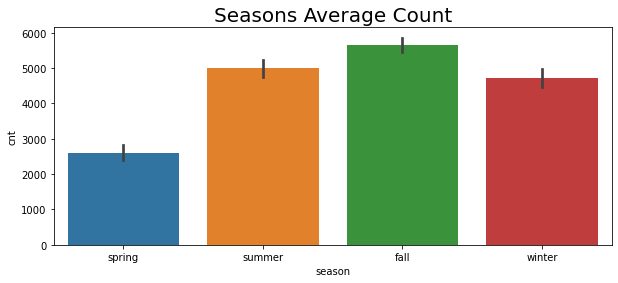

In [18]:
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
plt.figure(figsize=[10,4])
sns.barplot(df['season'], df['cnt'])
plt.title('Seasons Average Count', fontsize = 20)
plt.show()

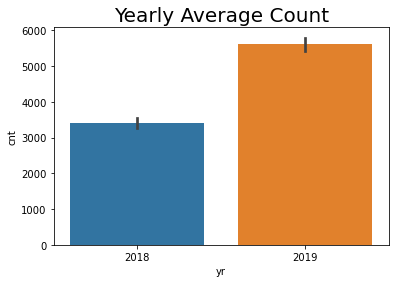

In [19]:
df['yr'] = df['yr'].map({0:'2018',1:'2019'})
sns.barplot(df['yr'],df['cnt'])
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

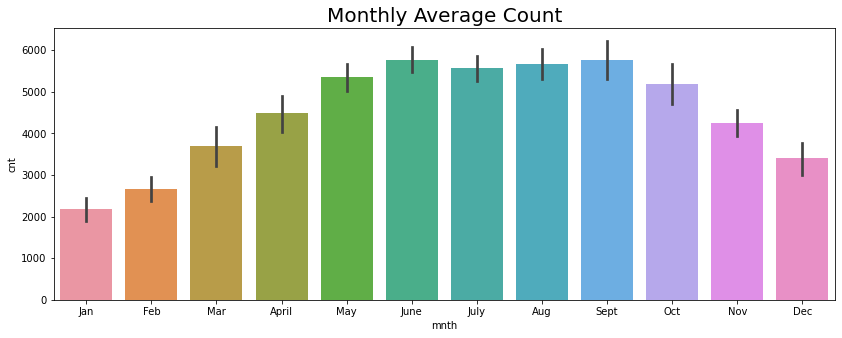

In [20]:
df['mnth'] = df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
plt.figure(figsize=[14,5])
sns.barplot(df['mnth'],df['cnt'])
plt.title('Monthly Average Count', fontsize = 20)
plt.show()

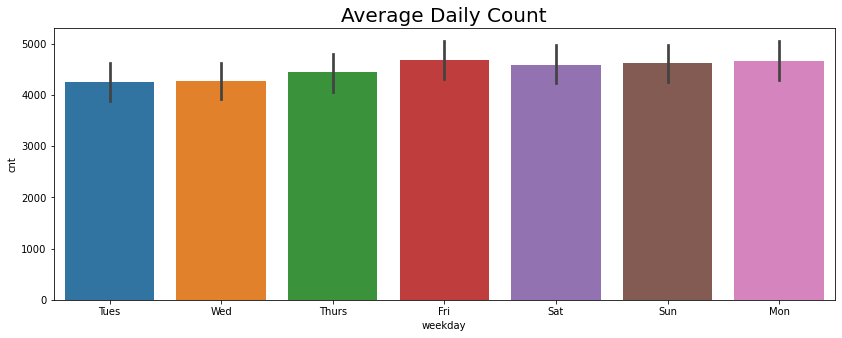

In [21]:
df['weekday'] = df['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
plt.figure(figsize=[14,5])
sns.barplot(df['weekday'],df['cnt'])
plt.title('Average Daily Count', fontsize = 20)
plt.show()

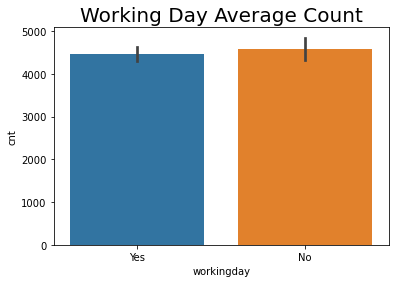

In [22]:
df['workingday'] = df['workingday'].map({0:'No',1:'Yes'})
sns.barplot(df['workingday'],df['cnt'])
plt.title('Working Day Average Count', fontsize = 20)
plt.show()

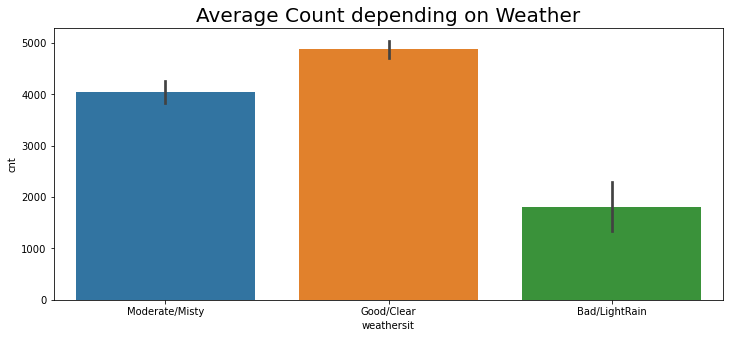

In [23]:
df['weathersit'] = df['weathersit'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})
plt.figure(figsize=[12,5])
sns.barplot(df['weathersit'],df['cnt'])
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()

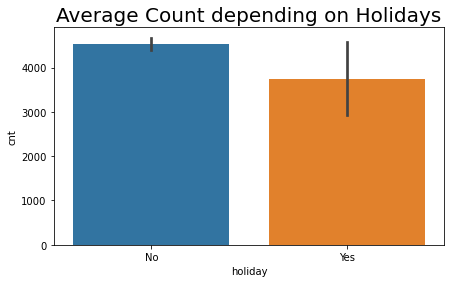

In [24]:
df['holiday'] = df['holiday'].map({0:'No',1:'Yes'})
plt.figure(figsize=[7,4])
sns.barplot(df['holiday'],df['cnt'])
plt.title('Average Count depending on Holidays', fontsize = 20)
plt.show()

### Numerical Variables

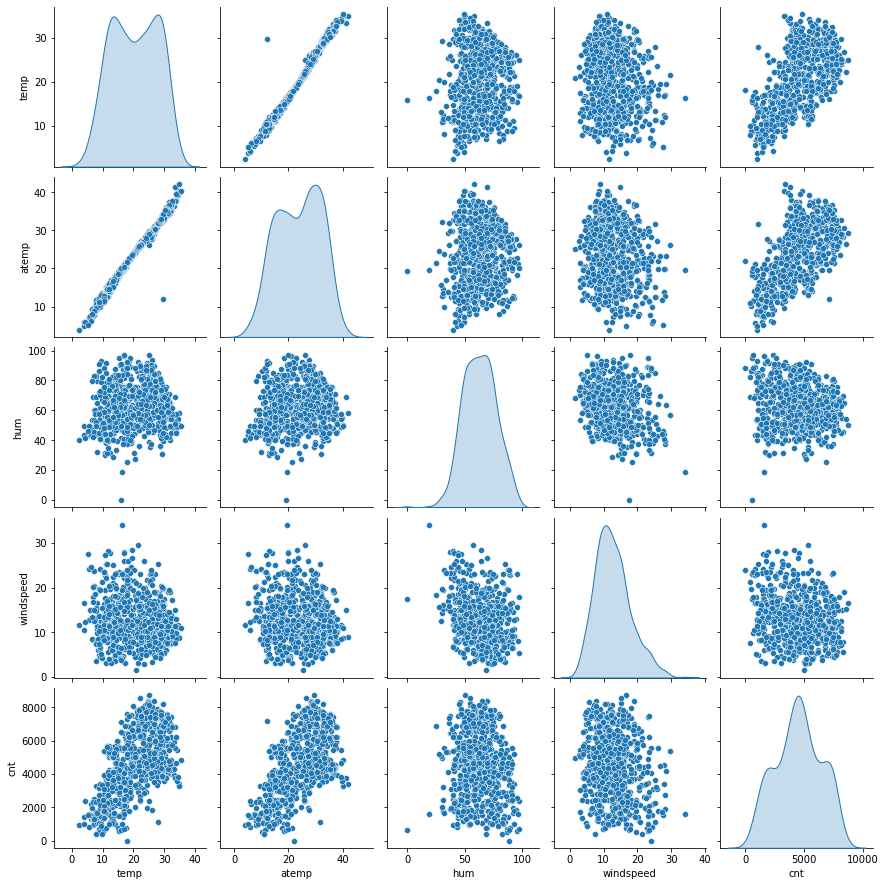

In [25]:
df_plot = df[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(df_plot, diag_kind = 'kde')
plt.show()

### Correlation Matrix

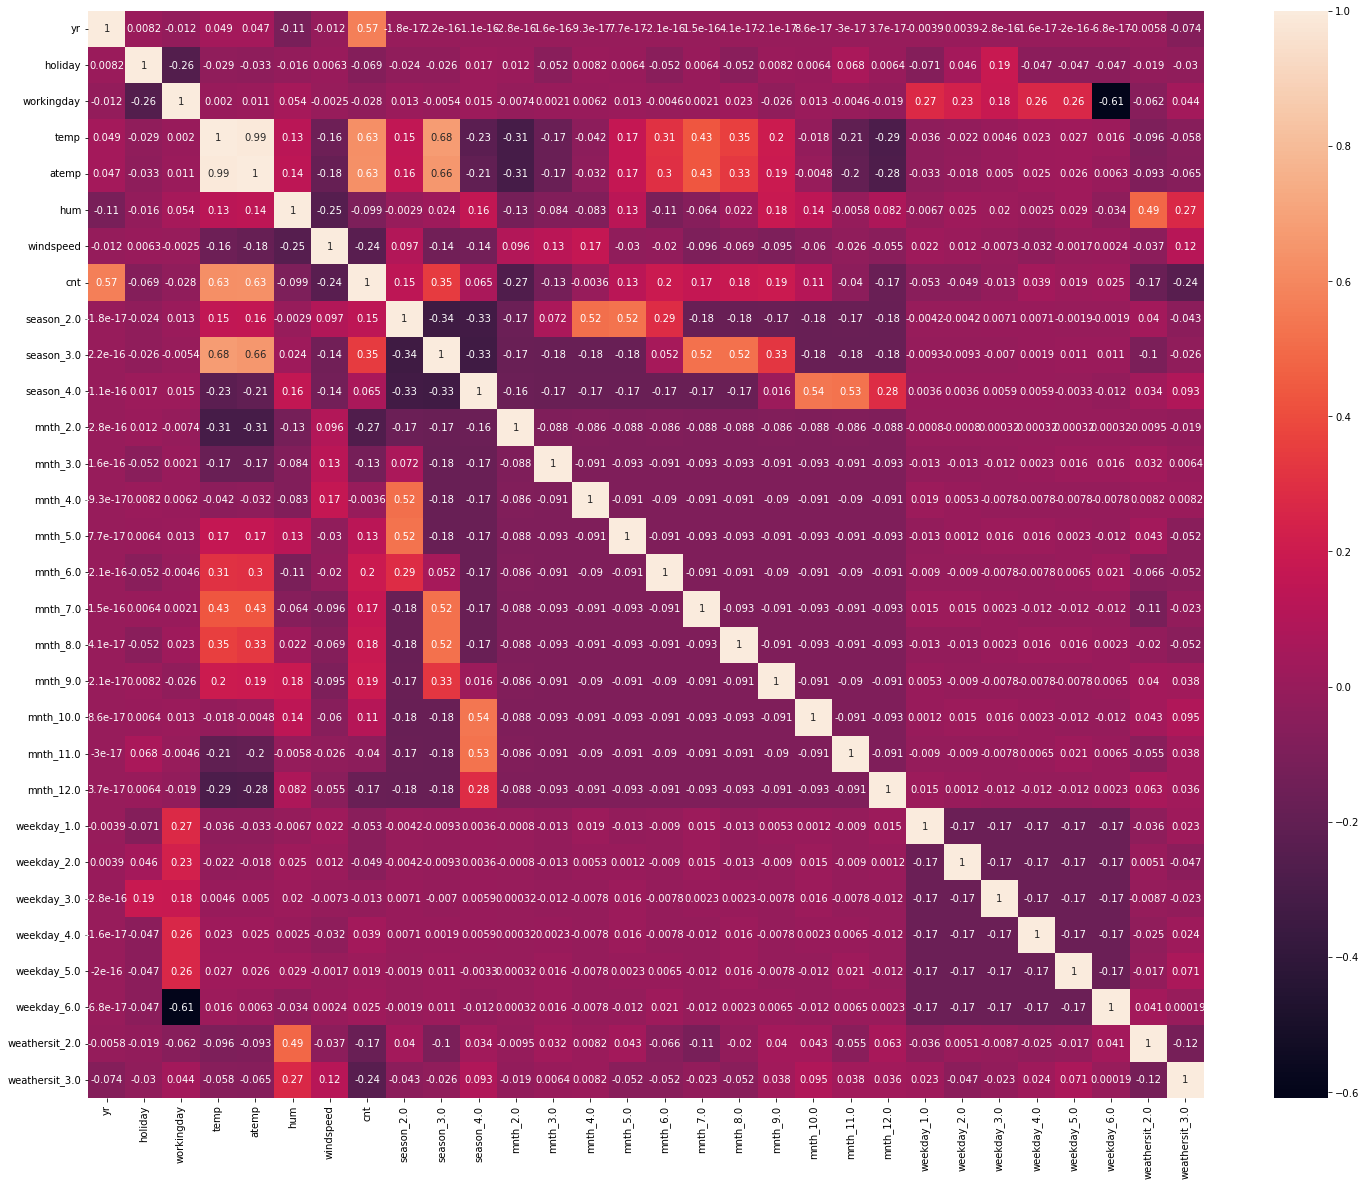

In [26]:
plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True);

## Rescaling Features

In [27]:
scaler = MinMaxScaler()

In [28]:
bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2.0', 'season_3.0', 'season_4.0', 'mnth_2.0', 'mnth_3.0',
       'mnth_4.0', 'mnth_5.0', 'mnth_6.0', 'mnth_7.0', 'mnth_8.0', 'mnth_9.0',
       'mnth_10.0', 'mnth_11.0', 'mnth_12.0', 'weekday_1.0', 'weekday_2.0',
       'weekday_3.0', 'weekday_4.0', 'weekday_5.0', 'weekday_6.0',
       'weathersit_2.0', 'weathersit_3.0'],
      dtype='object')

In [29]:
bike_train, bike_test = train_test_split(bike, train_size = 0.70, random_state = 122)

In [30]:
bike_train.shape, bike_test.shape

((510, 30), (220, 30))

In [31]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train[num_vars].head()

,temp,atemp,hum,windspeed,cnt
256,0.765327,0.733078,0.604665,0.313070,0.547975
650,0.416433,0.417939,0.313995,0.260076,0.815347
664,0.586727,0.583517,0.637560,0.484367,0.900828
311,0.435124,0.445839,0.639953,0.066957,0.481247
721,0.232641,0.241404,0.343900,0.227368,0.203060


In [32]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2.0,season_3.0,...,mnth_11.0,mnth_12.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weathersit_2.0,weathersit_3.0
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.492157,0.029412,0.705882,0.542748,0.527857,0.509331,0.370391,0.516445,0.245098,0.260784,...,0.082353,0.088235,0.139216,0.145098,0.150980,0.149020,0.149020,0.139216,0.339216,0.029412
std,0.500429,0.169124,0.456092,0.227565,0.217079,0.201850,0.188405,0.221426,0.430568,0.439494,...,0.275172,0.283915,0.346511,0.352545,0.358381,0.356457,0.356457,0.346511,0.473908,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.338555,0.335373,0.353917,0.230494,0.364588,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.559210,0.553546,0.511962,0.352784,0.521054,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743521,0.707754,0.658343,0.477996,0.676542,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

In [33]:
y_train = bike_train.pop('cnt')
X_train = bike_train

y_train.shape, X_train.shape

((510,), (510, 29))

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2.0', True, 1),
 ('season_3.0', True, 1),
 ('season_4.0', True, 1),
 ('mnth_2.0', False, 9),
 ('mnth_3.0', True, 1),
 ('mnth_4.0', True, 1),
 ('mnth_5.0', True, 1),
 ('mnth_6.0', True, 1),
 ('mnth_7.0', False, 8),
 ('mnth_8.0', False, 2),
 ('mnth_9.0', True, 1),
 ('mnth_10.0', True, 1),
 ('mnth_11.0', False, 10),
 ('mnth_12.0', False, 15),
 ('weekday_1.0', False, 14),
 ('weekday_2.0', False, 12),
 ('weekday_3.0', False, 13),
 ('weekday_4.0', False, 7),
 ('weekday_5.0', False, 6),
 ('weekday_6.0', False, 11),
 ('weathersit_2.0', False, 4),
 ('weathersit_3.0', True, 1)]

In [36]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2.0', 'season_3.0',
       'season_4.0', 'mnth_3.0', 'mnth_4.0', 'mnth_5.0', 'mnth_6.0',
       'mnth_9.0', 'mnth_10.0', 'weathersit_3.0'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2.0', 'mnth_7.0', 'mnth_8.0',
       'mnth_11.0', 'mnth_12.0', 'weekday_1.0', 'weekday_2.0', 'weekday_3.0',
       'weekday_4.0', 'weekday_5.0', 'weekday_6.0', 'weathersit_2.0'],
      dtype='object')

In [38]:
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,yr,temp,atemp,hum,windspeed,season_2.0,season_3.0,season_4.0,mnth_3.0,mnth_4.0,mnth_5.0,mnth_6.0,mnth_9.0,mnth_10.0,weathersit_3.0
256,0.0,0.765327,0.733078,0.604665,0.313070,0,1,0,0,0,0,0,1,0,0
650,1.0,0.416433,0.417939,0.313995,0.260076,0,0,1,0,0,0,0,0,1,0
664,1.0,0.586727,0.583517,0.637560,0.484367,0,0,1,0,0,0,0,0,1,0
311,0.0,0.435124,0.445839,0.639953,0.066957,0,0,1,0,0,0,0,0,0,0
721,1.0,0.232641,0.241404,0.343900,0.227368,0,0,0,0,0,0,0,0,0,0


### Model 1

In [39]:
X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          4.21e-186
Time:                        23:32:24   Log-Likelihood:                 514.56
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     494   BIC:                            -929.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1980      0.020      9.756      0.000       0.158       0.238
yr                 0.2242      0.008     27.340      0.000       0.208       0.240
temp               0.3900      0.132      2.963      0.003       0.131       0.649
atemp              0.1045      0.132      0.793      0.428      -0.154       0.363
hum               -0.2384      0.023    -10.258      0.000      -0.284      -0.193
windspeed         -0.1410      0.023     -6.148      0.000      -0.186      -0.096
season_2.0         0.0904      0.023      3.863      0.000       0.044       0.136
season_3.0         0.0871      0.022      4.049      0.000       0.045       0.129
season_4.0         0.1790      0.014     12.609      0.000       0.151       0.207
mnth_3.0           0.0502      0.017      2.896      0.004       0.016       0.084
mnth_4.0           0.0424      0.027      1.590      0.113      -0.010       0.095
mnth_5.0           0.0835      0.027      3.116      0.002       0.031       0.136
mnth_6.0           0.0433      0.022      1.944      0.052      -0.000       0.087
mnth_9.0           0.0933      0.015      6.065      0.000       0.063       0.123
mnth_10.0          0.0473      0.018      2.584      0.010       0.011       0.083
weathersit_3.0    -0.1655      0.026     -6.401      0.000      -0.216      -0.115
==============================================================================
Omnibus:                      106.994   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.479
Skew:                          -0.989   Prob(JB):                     4.23e-70
Kurtosis:                       6.335   Cond. No.                         73.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,380.75
2,atemp,355.66
5,season_2.0,8.51
6,season_3.0,7.55
3,hum,6.99
10,mnth_5.0,4.37
4,windspeed,3.82
9,mnth_4.0,3.62
7,season_4.0,3.06
11,mnth_6.0,2.28


### Model 2

In [41]:
X_train_rfe2 = X_train_rfe.drop('atemp', axis = 1)

X_train_lm2 = sm.add_constant(X_train_rfe2)

lr2 = sm.OLS(y_train, X_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.6
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          4.14e-187
Time:                        23:32:52   Log-Likelihood:                 514.23
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     495   BIC:                            -934.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.020      9.875      0.000       0.160       0.239
yr                 0.2242      0.008     27.345      0.000       0.208       0.240
temp               0.4905      0.036     13.725      0.000       0.420       0.561
hum               -0.2379      0.023    -10.244      0.000      -0.284      -0.192
windspeed         -0.1435      0.023     -6.327      0.000      -0.188      -0.099
season_2.0         0.0903      0.023      3.857      0.000       0.044       0.136
season_3.0         0.0858      0.021      4.003      0.000       0.044       0.128
season_4.0         0.1795      0.014     12.662      0.000       0.152       0.207
mnth_3.0           0.0506      0.017      2.927      0.004       0.017       0.085
mnth_4.0           0.0437      0.027      1.640      0.102      -0.009       0.096
mnth_5.0           0.0839      0.027      3.131      0.002       0.031       0.137
mnth_6.0           0.0430      0.022      1.934      0.054      -0.001       0.087
mnth_9.0           0.0929      0.015      6.046      0.000       0.063       0.123
mnth_10.0          0.0475      0.018      2.594      0.010       0.012       0.083
weathersit_3.0    -0.1668      0.026     -6.465      0.000      -0.217      -0.116
==============================================================================
Omnibus:                      105.754   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.750
Skew:                          -0.979   Prob(JB):                     7.41e-69
Kurtosis:                       6.306   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,23.91
4,season_2.0,8.50
5,season_3.0,7.50
2,hum,6.92
9,mnth_5.0,4.37
3,windspeed,3.78
8,mnth_4.0,3.61
6,season_4.0,3.05
10,mnth_6.0,2.28
0,yr,1.96


### Model 3

In [43]:
X_train_rfe3 = X_train_rfe2.drop('season_2.0', axis = 1)

X_train_lm3 = sm.add_constant(X_train_rfe3)

lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.4
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          4.27e-185
Time:                        23:33:37   Log-Likelihood:                 506.68
No. Observations:                 510   AIC:                            -985.4
Df Residuals:                     496   BIC:                            -926.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1954      0.020      9.556      0.000       0.155       0.236
yr                 0.2232      0.008     26.872      0.000       0.207       0.240
temp               0.5287      0.035     15.188      0.000       0.460       0.597
hum               -0.2371      0.024    -10.070      0.000      -0.283      -0.191
windspeed         -0.1446      0.023     -6.285      0.000      -0.190      -0.099
season_3.0         0.0542      0.020      2.699      0.007       0.015       0.094
season_4.0         0.1676      0.014     11.945      0.000       0.140       0.195
mnth_3.0           0.0656      0.017      3.839      0.000       0.032       0.099
mnth_4.0           0.1190      0.018      6.481      0.000       0.083       0.155
mnth_5.0           0.1530      0.020      7.580      0.000       0.113       0.193
mnth_6.0           0.0860      0.020      4.404      0.000       0.048       0.124
mnth_9.0           0.0956      0.016      6.144      0.000       0.065       0.126
mnth_10.0          0.0433      0.019      2.338      0.020       0.007       0.080
weathersit_3.0    -0.1653      0.026     -6.321      0.000      -0.217      -0.114
==============================================================================
Omnibus:                      101.489   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.213
Skew:                          -0.965   Prob(JB):                     1.42e-61
Kurtosis:                       6.076   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,22.05
2,hum,6.92
4,season_3.0,6.42
3,windspeed,3.77
5,season_4.0,2.88
8,mnth_5.0,2.39
0,yr,1.96
9,mnth_6.0,1.70
7,mnth_4.0,1.67
11,mnth_10.0,1.58


### Model 4

In [45]:
X_train_rfe4 = X_train_rfe3.drop('hum', axis = 1)

X_train_lm4 = sm.add_constant(X_train_rfe4)

lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     168.2
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.80e-166
Time:                        23:33:56   Log-Likelihood:                 459.25
No. Observations:                 510   AIC:                            -892.5
Df Residuals:                     497   BIC:                            -837.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0777      0.018      4.222      0.000       0.042       0.114
yr                 0.2387      0.009     26.660      0.000       0.221       0.256
temp               0.4690      0.038     12.471      0.000       0.395       0.543
windspeed         -0.0911      0.025     -3.713      0.000      -0.139      -0.043
season_3.0         0.0760      0.022      3.470      0.001       0.033       0.119
season_4.0         0.1637      0.015     10.645      0.000       0.133       0.194
mnth_3.0           0.0707      0.019      3.772      0.000       0.034       0.107
mnth_4.0           0.1336      0.020      6.654      0.000       0.094       0.173
mnth_5.0           0.1463      0.022      6.613      0.000       0.103       0.190
mnth_6.0           0.1123      0.021      5.296      0.000       0.071       0.154
mnth_9.0           0.0689      0.017      4.098      0.000       0.036       0.102
mnth_10.0          0.0362      0.020      1.781      0.076      -0.004       0.076
weathersit_3.0    -0.2545      0.027     -9.433      0.000      -0.307      -0.201
==============================================================================
Omnibus:                       98.283   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.670
Skew:                          -0.974   Prob(JB):                     1.22e-53
Kurtosis:                       5.770   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,16.14
3,season_3.0,6.14
2,windspeed,3.69
4,season_4.0,2.79
7,mnth_5.0,2.39
0,yr,1.96
6,mnth_4.0,1.66
8,mnth_6.0,1.63
10,mnth_10.0,1.57
5,mnth_3.0,1.46


### Model 5

In [47]:
X_train_rfe5 = X_train_rfe4.drop('mnth_5.0', axis = 1)

X_train_lm5 = sm.add_constant(X_train_rfe5)

lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     165.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.42e-158
Time:                        23:34:33   Log-Likelihood:                 437.74
No. Observations:                 510   AIC:                            -851.5
Df Residuals:                     498   BIC:                            -800.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0648      0.019      3.400      0.001       0.027       0.102
yr                 0.2330      0.009     25.090      0.000       0.215       0.251
temp               0.6238      0.031     20.332      0.000       0.564       0.684
windspeed         -0.0960      0.026     -3.755      0.000      -0.146      -0.046
season_3.0        -0.0224      0.017     -1.336      0.182      -0.055       0.011
season_4.0         0.1184      0.014      8.254      0.000       0.090       0.147
mnth_3.0           0.0262      0.018      1.436      0.152      -0.010       0.062
mnth_4.0           0.0725      0.019      3.903      0.000       0.036       0.109
mnth_6.0           0.0473      0.020      2.415      0.016       0.009       0.086
mnth_9.0           0.0589      0.017      3.378      0.001       0.025       0.093
mnth_10.0          0.0162      0.021      0.772      0.440      -0.025       0.057
weathersit_3.0    -0.2523      0.028     -8.976      0.000      -0.308      -0.197
==============================================================================
Omnibus:                       64.105   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.601
Skew:                          -0.740   Prob(JB):                     3.93e-27
Kurtosis:                       4.880   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,8.19
2,windspeed,3.64
3,season_3.0,3.33
4,season_4.0,2.11
0,yr,1.93
9,mnth_10.0,1.55
6,mnth_4.0,1.31
8,mnth_9.0,1.30
7,mnth_6.0,1.29
5,mnth_3.0,1.26


### Model 6

In [49]:
X_train_rfe6 = X_train_rfe5.drop('mnth_10.0', axis = 1)

X_train_lm6 = sm.add_constant(X_train_rfe6)

lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     181.9
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.35e-159
Time:                        23:34:56   Log-Likelihood:                 437.43
No. Observations:                 510   AIC:                            -852.9
Df Residuals:                     499   BIC:                            -806.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0625      0.019      3.322      0.001       0.026       0.100
yr                 0.2326      0.009     25.093      0.000       0.214       0.251
temp               0.6285      0.030     20.917      0.000       0.570       0.688
windspeed         -0.0948      0.026     -3.718      0.000      -0.145      -0.045
season_3.0        -0.0236      0.017     -1.414      0.158      -0.056       0.009
season_4.0         0.1234      0.013      9.655      0.000       0.098       0.149
mnth_3.0           0.0262      0.018      1.437      0.151      -0.010       0.062
mnth_4.0           0.0719      0.019      3.877      0.000       0.035       0.108
mnth_6.0           0.0461      0.020      2.363      0.018       0.008       0.084
mnth_9.0           0.0567      0.017      3.296      0.001       0.023       0.090
weathersit_3.0    -0.2489      0.028     -8.968      0.000      -0.303      -0.194
==============================================================================
Omnibus:                       60.892   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.564
Skew:                          -0.716   Prob(JB):                     3.61e-25
Kurtosis:                       4.801   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,8.05
2,windspeed,3.64
3,season_3.0,3.32
0,yr,1.91
4,season_4.0,1.72
6,mnth_4.0,1.30
7,mnth_6.0,1.29
5,mnth_3.0,1.26
8,mnth_9.0,1.26
9,weathersit_3.0,1.07


### Model 7

In [51]:
X_train_rfe7 = X_train_rfe6.drop('mnth_4.0', axis = 1)

X_train_lm7 = sm.add_constant(X_train_rfe7)

lr7 = sm.OLS(y_train, X_train_lm7).fit()

lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     195.0
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.60e-157
Time:                        23:35:31   Log-Likelihood:                 429.86
No. Observations:                 510   AIC:                            -839.7
Df Residuals:                     500   BIC:                            -797.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0675      0.019      3.543      0.000       0.030       0.105
yr                 0.2306      0.009     24.570      0.000       0.212       0.249
temp               0.6466      0.030     21.480      0.000       0.587       0.706
windspeed         -0.0863      0.026     -3.348      0.001      -0.137      -0.036
season_3.0        -0.0432      0.016     -2.682      0.008      -0.075      -0.012
season_4.0         0.1087      0.012      8.783      0.000       0.084       0.133
mnth_3.0           0.0109      0.018      0.606      0.545      -0.024       0.046
mnth_6.0           0.0326      0.019      1.675      0.094      -0.006       0.071
mnth_9.0           0.0554      0.017      3.179      0.002       0.021       0.090
weathersit_3.0    -0.2491      0.028     -8.851      0.000      -0.304      -0.194
==============================================================================
Omnibus:                       59.841   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.474
Skew:                          -0.706   Prob(JB):                     1.03e-24
Kurtosis:                       4.790   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,7.45
2,windspeed,3.56
3,season_3.0,2.98
0,yr,1.91
4,season_4.0,1.57
7,mnth_9.0,1.26
6,mnth_6.0,1.24
5,mnth_3.0,1.20
8,weathersit_3.0,1.07


### Model 8

In [53]:
X_train_rfe8 = X_train_rfe7.drop('mnth_9.0', axis = 1)

X_train_lm8 = sm.add_constant(X_train_rfe8)

lr8 = sm.OLS(y_train, X_train_lm8).fit()

lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     214.2
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          2.51e-156
Time:                        23:35:41   Log-Likelihood:                 424.76
No. Observations:                 510   AIC:                            -831.5
Df Residuals:                     501   BIC:                            -793.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0670      0.019      3.488      0.001       0.029       0.105
yr                 0.2302      0.009     24.317      0.000       0.212       0.249
temp               0.6514      0.030     21.472      0.000       0.592       0.711
windspeed         -0.0887      0.026     -3.413      0.001      -0.140      -0.038
season_3.0        -0.0322      0.016     -2.028      0.043      -0.063      -0.001
season_4.0         0.1143      0.012      9.243      0.000       0.090       0.139
mnth_3.0           0.0107      0.018      0.590      0.555      -0.025       0.046
mnth_6.0           0.0263      0.020      1.345      0.179      -0.012       0.065
weathersit_3.0    -0.2441      0.028     -8.608      0.000      -0.300      -0.188
==============================================================================
Omnibus:                       50.874   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.356
Skew:                          -0.581   Prob(JB):                     3.60e-23
Kurtosis:                       4.875   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,7.42
2,windspeed,3.55
3,season_3.0,2.83
0,yr,1.91
4,season_4.0,1.54
6,mnth_6.0,1.23
5,mnth_3.0,1.20
7,weathersit_3.0,1.07


## Model Validation

### Residual Analysis

In [55]:
y_train_pred = lr8.predict(X_train_lm8)

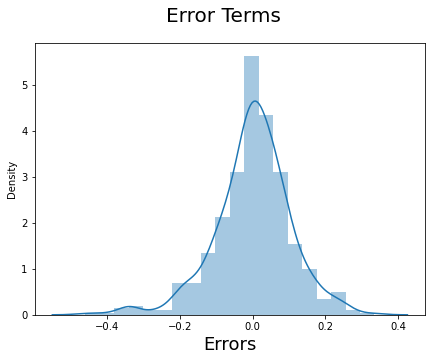

In [56]:
res = y_train - y_train_pred

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Check for Homoscedasticity

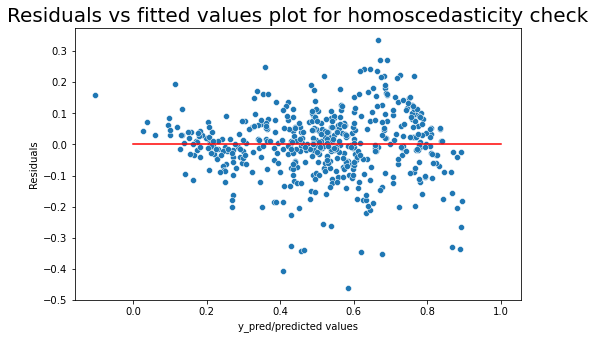

In [57]:
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

In [58]:
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test[num_vars].head()

,temp,atemp,hum,windspeed,cnt
701,0.490158,0.504116,0.705742,0.101229,0.714680
303,0.349977,0.370658,0.613636,0.160412,0.419581
707,0.405012,0.416266,0.903709,0.289714,0.368845
585,0.868126,0.830239,0.494618,0.285018,0.835711
116,0.698871,0.663818,0.803230,0.675992,0.442936


In [59]:
bike_test[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.546413,0.532248,0.494968,0.373014,0.515325
std,0.229969,0.221002,0.210211,0.207554,0.226248
min,0.046591,0.026455,-0.395932,-0.049874,0.069144
25%,0.355733,0.368349,0.343600,0.233239,0.358088
50%,0.530654,0.528618,0.494618,0.327054,0.511390
75%,0.741704,0.713235,0.629785,0.482817,0.688593
max,0.984424,1.019437,0.997010,1.165056,0.959503


In [60]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [61]:
X_test.shape, y_test.shape

((220, 29), (220,))

In [62]:
col_test = X_train_rfe8.columns

X_test = X_test[col_test]

X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.head()

,const,yr,temp,windspeed,season_3.0,season_4.0,mnth_3.0,mnth_6.0,weathersit_3.0
701,1.0,1.0,0.490158,0.101229,0,1,0,0,0
303,1.0,0.0,0.349977,0.160412,0,1,0,0,0
707,1.0,1.0,0.405012,0.289714,0,1,0,0,0
585,1.0,1.0,0.868126,0.285018,1,0,0,0,0
116,1.0,0.0,0.698871,0.675992,0,0,0,0,0


In [63]:
y_test_pred = lr8.predict(X_test_lm8)

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

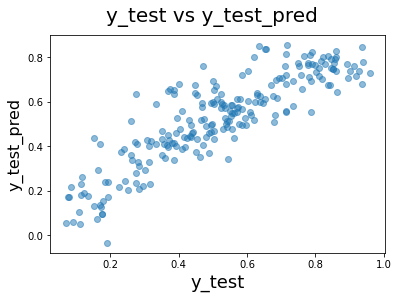

In [64]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

### Residual Analysis

In [65]:
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 75.45
Train data r^2 : 77.38


### Adjusted R^2 Value for TEST

In [66]:
n = X_test.shape[0]
n1 = X_train_rfe8.shape[0]

p = X_test.shape[1]
p1 = X_train_rfe8.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 74.52
Train data adjusted r^2 : 77.02


#### This seems to be a really good model that can very well 'Generalize' various datasets.

#### As per our final Model, the below predictor variables influences bike booking :

##### 1	temp
##### 2	windspeed	3.55
##### 3	season_3.0	2.83
##### 4	yr	1.91
##### 5	season_4.0	1.54
##### 6	mnth_6.0	1.23
##### 7	mnth_3.0	1.20
##### 8	weathersit_3.0	1.07